# Uploading, Streaming, and Sampling Data

## Uploading small amounts of data into memory

In [42]:
with open("res/Colors.txt", 'r') as open_file:
    print('Colors.txt Content:\n' + open_file.read())

Colors.txt Content:
Color	Value
Red	1
Orange	2
Yellow	3
Green	4
Blue	5
Purple	6
Black	7
White	8


## Streaming large amounts of data into memory

In [43]:
with open("res/Colors.txt", 'r') as open_file:
    for observation in open_file:
        print('Reading Data: ' + observation)

Reading Data: Color	Value

Reading Data: Red	1

Reading Data: Orange	2

Reading Data: Yellow	3

Reading Data: Green	4

Reading Data: Blue	5

Reading Data: Purple	6

Reading Data: Black	7

Reading Data: White	8


## Sampling Data

### Fixed Samples

In [44]:
n = 2
with open("res/Colors.txt", 'r') as open_file:
    for j, observation in enumerate(open_file):
        if j % n == 0:
            print('Reading Line: ' + str(j) + ' Content: ' + observation)

Reading Line: 0 Content: Color	Value

Reading Line: 2 Content: Orange	2

Reading Line: 4 Content: Green	4

Reading Line: 6 Content: Purple	6

Reading Line: 8 Content: White	8


### Random Samples

In [45]:
from random import random
sample_size = 0.25
with open("res/Colors.txt", 'r') as open_file:
    for j, observation in enumerate(open_file):
        if random() <= sample_size:
            print('Reading Line: ' + str(j) + ' Content: ' + observation)

Reading Line: 4 Content: Green	4

Reading Line: 6 Content: Purple	6



# Accessing Data in Structured Flat File Form

## Reading from a text file

In [46]:
import pandas as pd
color_table = pd.io.parsers.read_table("res/Colors.txt")
print(color_table)

    Color  Value
0     Red      1
1  Orange      2
2  Yellow      3
3   Green      4
4    Blue      5
5  Purple      6
6   Black      7
7   White      8


## Reading CSV delimited format

In [47]:
import pandas as pd
titanic = pd.io.parsers.read_csv("res/Titanic.csv")
X = titanic[['age']].values
print(X)

[[ 29.        ]
 [  0.91670001]
 [  2.        ]
 ..., 
 [ 26.5       ]
 [ 27.        ]
 [ 29.        ]]


## Reading Excel and other Microsoft Office files

In [48]:
import pandas as pd
xls = pd.ExcelFile("res/Values.xls")
trig_values = xls.parse('Sheet1', index_col = None, na_values = ['NA'])
print(trig_values)

    Angle (Degrees)      Sine    Cosine    Tangent
0        138.550574  0.661959 -0.749540  -0.883153
1        305.535745 -0.813753  0.581211  -1.400100
2        280.518695 -0.983195  0.182556  -5.385709
3        216.363795 -0.592910 -0.805269   0.736289
4         36.389247  0.593268  0.805005   0.736974
5         31.474311  0.522116  0.852874   0.612184
6        120.121669  0.864962 -0.501838  -1.723588
7        293.947055 -0.913921  0.405892  -2.251634
8        179.882632  0.002048 -0.999998  -0.002048
9        120.927562  0.857818 -0.513954  -1.669056
10        71.349485  0.947487  0.319795   2.962796
11       241.971082 -0.882711 -0.469917   1.878439
12       297.208817 -0.889346  0.457235  -1.945053
13       142.004551  0.615599 -0.788060  -0.781158
14       173.770696  0.108508 -0.994096  -0.109152
15       229.232002 -0.757360 -0.652998   1.159820
16        67.926976  0.926706  0.375788   2.466033
17       261.866575 -0.989941 -0.141479   6.997102
18        59.185450  0.858830  

# Sending Data in Unstructured File Form

## Rendering the image

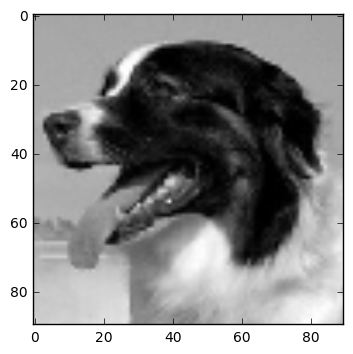

In [50]:
from skimage.io import imread
from skimage.transform import resize
from matplotlib import pyplot as plt
import matplotlib.cm as cm

example_file = ("http://upload.wikimedia.org/wikipedia/commons/7/7d/Dog_face.png")
image = imread(example_file, as_grey = True)
plt.imshow(image, cmap = cm.gray)
plt.show()

## Displaying the image information

In [51]:
print("data type: %s, shape: %s" % (type(image), image.shape))

data type: <class 'numpy.ndarray'>, shape: (90, 90)


## Cropping the image

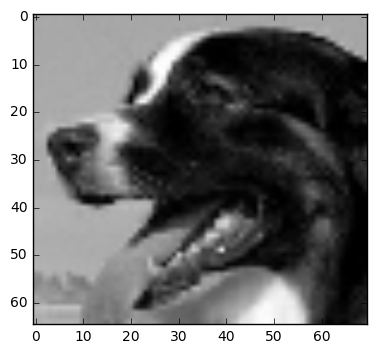

In [52]:
image2 = image[5:70, 0:70]
plt.imshow(image2, cmap = cm.gray)
plt.show()

## Resizing the image

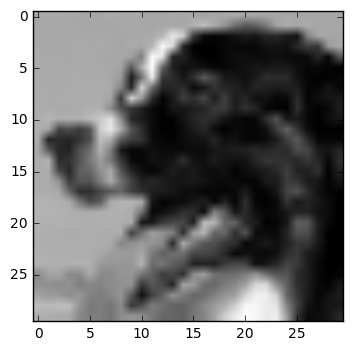

data type: <class 'numpy.ndarray'>, shape: (30, 30)


In [55]:
image3 = resize(image2, (30, 30), mode = 'edge')
plt.imshow(image3, cmap = cm.gray)
plt.show()
print("data type: %s, shape: %s" %(type(image3), image3.shape))

## Flatening the image

In [56]:
image_row = image3.flatten()
print("data type: %s, shape: %s" %(type(image_row), image_row.shape))

data type: <class 'numpy.ndarray'>, shape: (900,)


# Accessing Data from the Web

In [61]:
from lxml import objectify
import pandas as pd

xml = objectify.parse(open('res/XMLData.xml'))
root = xml.getroot()

df = pd.DataFrame(columns = ('Number', 'String', 'Boolean'))

for i in range(0,4):
    obj = root.getchildren()[i].getchildren()
    row = dict(zip(['Number', 'String', 'Boolean'], [obj[0].text, obj[1].text, obj[2].text]))
    row_s = pd.Series(row)
    row_s.name = i
    df = df.append(row_s)
    
print(df)

  Number  String Boolean
0      1   First    True
1      2  Second   False
2      3   Third    True
3      4  Fourth   False
